In [1]:
import numpy as np

import matplotlib.pyplot as plt
import getdist.plots as gdplt

from sympy import *
import sympy

from tabulate import tabulate

%matplotlib inline

plt.rcParams.update({"text.usetex": True,"font.family": "serif"})

def getGaussianErrors(fisher):
    gaussianErrors = np.sqrt(np.diag(np.linalg.inv(fisher)))
    return gaussianErrors

def getMyCovs(fisher):
    myCovs = np.linalg.inv(fisher)
    return myCovs
    
def getCovs(covMat):
    return np.sqrt(np.diag(covMat))

myColors = ['C1', 'C2', 'C4']

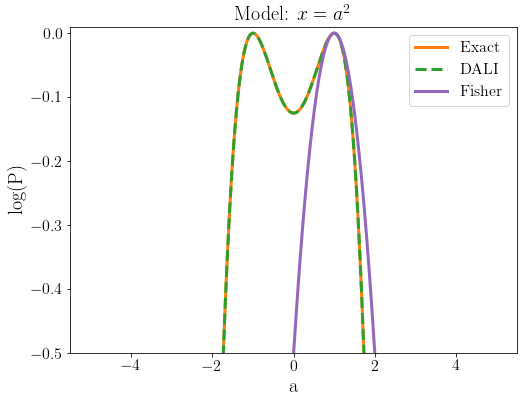

In [2]:
### first model

# the model parameters
ap = Symbol('ap')
modelp = [ap]

# the errors on observed quantities
ox = Symbol('ox')

# dictionary of different models
models = dict()

pown=2
powd=0.25
models[0] = {'x': ap**2,
             'an': 1,
             'oxn': 2}

# the model
modeln = 0
m = modeln
x = models[m]['x']
an = models[m]['an']
oxn = models[m]['oxn']

# the tensors
F = lambda i,j : 1/ox**2 * diff(x,i) * diff(x,j)
G = lambda i,j,k : 1/ox**2 * diff(x,i,j) * diff(x,k)
H = lambda i,j,k,l : 1/ox**2 * diff(x,i,j) * diff(x,k,l)
I = lambda i,j,k,l : 1/ox**2 * diff(x,i) * diff(x,j,k,l)
J = lambda i,j,k,l,m : 1/ox**2 * diff(x,i,j,k) * diff(x,l,m)
K = lambda i,j,k,l,m,n : 1/ox**2 * diff(x,i,j,k) * diff(x,l,m,n)

subbing = [(ap,an),(ox,oxn)]
s=1
Fmatrix = np.zeros((s,s))
Gtensor = np.zeros((s,s,s))
Htensor = np.zeros((s,s,s,s))
Itensor = np.zeros((s,s,s,s))
Jtensor = np.zeros((s,s,s,s,s))
Ktensor = np.zeros((s,s,s,s,s,s))
for i, pi in enumerate(modelp):
    for j, pj in enumerate(modelp):
        Fmatrix[i,j] = F(pi,pj).subs(subbing)
        for k, pk in enumerate(modelp):
            Gtensor[i,j,k] = G(pi,pj,pk).subs(subbing)
            for l, pl in enumerate(modelp):
                Htensor[i,j,k,l] = H(pi,pj,pk,pl).subs(subbing)
                Itensor[i,j,k,l] = I(pi,pj,pk,pl).subs(subbing)
                for m, pm in enumerate(modelp):
                    Jtensor[i,j,k,l,m] = J(pi,pj,pk,pl,pm).subs(subbing)
                    for n, pn in enumerate(modelp):
                        Ktensor[i,j,k,l,m,n] = K(pi,pj,pk,pl,pm,pn).subs(subbing)
m = modeln

myGaussianErrors = getGaussianErrors(Fmatrix)
myCovs = getMyCovs(Fmatrix)
myMeans = [an]

def getLogLikelihoodEstimateToCobayaFisher(a, \
                                     gaussianErrors=myGaussianErrors, \
                                     fisher=Fmatrix, \
                                     DALI3 = None, DALI4 = None):
    p1 = a-an
    deviationVector = p1
    deltaP = deviationVector
    
    logLike = -0.5*(fisher[0][0]*deltaP*deltaP)
    return logLike

def getLogLikelihoodEstimateToCobayaDALIDoublet(a, \
                                      gaussianErrors=myGaussianErrors, \
                                      fisher=Fmatrix, \
                                      DALI3 = Gtensor, DALI4 = Htensor):
    p1 = a-an
    deviationVector = p1
    
    deltaP = deviationVector
    logLike = -0.5*(fisher[0][0]*deltaP*deltaP)
    logLike += -0.5*(DALI3[0][0][0]*deltaP*deltaP*deltaP)
    logLike += -0.125*(DALI4[0][0][0][0]*deltaP*deltaP*deltaP*deltaP)
    return logLike

xdiff = x - x.subs([(ap,an)])
logLikeSym = -0.5*((xdiff/ox)**2)
logLikeLam = lambdify((ap, ox), logLikeSym, 'numpy')

def getLogLikelihoodEstimateToCobayaExact(a):
    logLike = logLikeLam(a,oxn)
    return logLike

grid = np.linspace(-5,5,10000)
exactLike = [getLogLikelihoodEstimateToCobayaExact(r) for r in grid]
fisherLike = [getLogLikelihoodEstimateToCobayaFisher(r) for r in grid]
doubletLike = [getLogLikelihoodEstimateToCobayaDALIDoublet(r) for r in grid]

plt.figure(figsize=(8,6))
plt.plot(grid, exactLike, label='Exact', color=myColors[0], linewidth=3)
plt.plot(grid, doubletLike, label='DALI', color=myColors[1], linestyle='--', linewidth=3)
plt.plot(grid, fisherLike, label='Fisher', color=myColors[2], linewidth=3)
plt.title('Model: $x=a^2$', fontsize=20)
plt.xlabel('a', fontsize=20)
plt.ylabel('log(P)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.5,0.01)
plt.legend(fontsize=16)

plt.savefig('ToyModel_a_2_1.pdf')

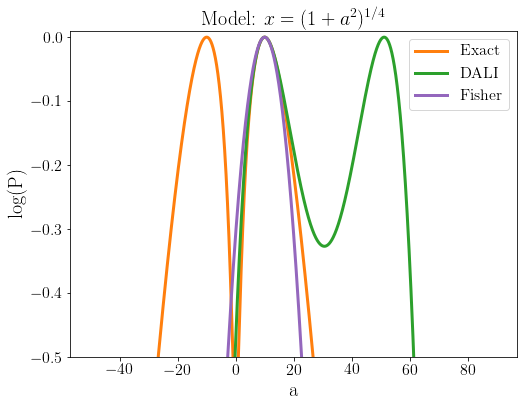

In [3]:
### second model

# the model parameters
ap = Symbol('ap')
modelp = [ap]

# the errors on observed quantities
ox = Symbol('ox')

# dictionary of different models
models = dict()

pown=2
powd=0.25
models[0] = {'x': np.power(1+ap**pown, powd),
             'an': 10,
             'oxn': 2}

# the model
modeln = 0
m = modeln
x = models[m]['x']
an = models[m]['an']
oxn = models[m]['oxn']

# the tensors
F = lambda i,j : 1/ox**2 * diff(x,i) * diff(x,j)
G = lambda i,j,k : 1/ox**2 * diff(x,i,j) * diff(x,k)
H = lambda i,j,k,l : 1/ox**2 * diff(x,i,j) * diff(x,k,l)
I = lambda i,j,k,l : 1/ox**2 * diff(x,i) * diff(x,j,k,l)
J = lambda i,j,k,l,m : 1/ox**2 * diff(x,i,j,k) * diff(x,l,m)
K = lambda i,j,k,l,m,n : 1/ox**2 * diff(x,i,j,k) * diff(x,l,m,n)

subbing = [(ap,an),(ox,oxn)]
s=1
Fmatrix = np.zeros((s,s))
Gtensor = np.zeros((s,s,s))
Htensor = np.zeros((s,s,s,s))
Itensor = np.zeros((s,s,s,s))
Jtensor = np.zeros((s,s,s,s,s))
Ktensor = np.zeros((s,s,s,s,s,s))
for i, pi in enumerate(modelp):
    for j, pj in enumerate(modelp):
        Fmatrix[i,j] = F(pi,pj).subs(subbing)
        for k, pk in enumerate(modelp):
            Gtensor[i,j,k] = G(pi,pj,pk).subs(subbing)
            for l, pl in enumerate(modelp):
                Htensor[i,j,k,l] = H(pi,pj,pk,pl).subs(subbing)
                Itensor[i,j,k,l] = I(pi,pj,pk,pl).subs(subbing)
                for m, pm in enumerate(modelp):
                    Jtensor[i,j,k,l,m] = J(pi,pj,pk,pl,pm).subs(subbing)
                    for n, pn in enumerate(modelp):
                        Ktensor[i,j,k,l,m,n] = K(pi,pj,pk,pl,pm,pn).subs(subbing)
m = modeln

myGaussianErrors = getGaussianErrors(Fmatrix)
myCovs = getMyCovs(Fmatrix)
myMeans = [an]

def getLogLikelihoodEstimateToCobayaFisher(a, \
                                     gaussianErrors=myGaussianErrors, \
                                     fisher=Fmatrix, \
                                     DALI3 = None, DALI4 = None):
    p1 = a-an
    deviationVector = p1
    deltaP = deviationVector
    
    logLike = -0.5*(fisher[0][0]*deltaP*deltaP)
    return logLike

def getLogLikelihoodEstimateToCobayaDALIDoublet(a, \
                                      gaussianErrors=myGaussianErrors, \
                                      fisher=Fmatrix, \
                                      DALI3 = Gtensor, DALI4 = Htensor):
    p1 = a-an
    deviationVector = p1
    
    deltaP = deviationVector
    logLike = -0.5*(fisher[0][0]*deltaP*deltaP)
    logLike += -0.5*(DALI3[0][0][0]*deltaP*deltaP*deltaP)
    logLike += -0.125*(DALI4[0][0][0][0]*deltaP*deltaP*deltaP*deltaP)
    return logLike

xdiff = x - x.subs([(ap,an)])
logLikeSym = -0.5*((xdiff/ox)**2)
logLikeLam = lambdify((ap, ox), logLikeSym, 'numpy')

def getLogLikelihoodEstimateToCobayaExact(a):
    logLike = logLikeLam(a,oxn)
    return logLike

grid = np.linspace(-50,90,10000)
exactLike = [getLogLikelihoodEstimateToCobayaExact(r) for r in grid]
fisherLike = [getLogLikelihoodEstimateToCobayaFisher(r) for r in grid]
doubletLike = [getLogLikelihoodEstimateToCobayaDALIDoublet(r) for r in grid]

plt.figure(figsize=(8,6))
plt.plot(grid, exactLike, label='Exact', color=myColors[0], linewidth=3)
plt.plot(grid, doubletLike, label='DALI', color=myColors[1], linewidth=3)
plt.plot(grid, fisherLike, label='Fisher', color=myColors[2], linewidth=3)
plt.title('Model: $x=(1+a^2)^{1/4}$', fontsize=20)
plt.xlabel('a', fontsize=20)
plt.ylabel('log(P)', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.5,0.01)
plt.legend(fontsize=16)

plt.savefig('ToyModel_1a_2_4.pdf')